Task1_0603. train.csv 파일로 생존자 예측 모델 생성을 위한 분석용 데이터 셋을 작성하세요.

In [48]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
file_path = 'drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/train.csv'

df = pd.read_csv(file_path)
#df.head()
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Palsson, Master. Gosta Leonard
Rice, Master. Eugene
Uruchurtu, Don. Manuel E
Panula, Master. Juha Niilo
Goodwin, Master. William Frederick
Skoog, Master. Harald
Moubarek, Master. Gerios
Caldwell, Master. Alden Gates
Nicola-Yarred, Master. Elias
Byles, Rev. Thomas Roussel Davids
Bateman, Rev. Robert James
Sage, Master. Thomas Henry
Panula, Master. Eino Viljami
Goldsmith, Master. Frank John William "Frankie"
Rice, Master. Arthur
Lefebre, Master. Henry Forbes
Asplund, Master. Clarence Gustaf Hugo
Becker, Master. Richard F
Navratil, Master. Michel M
Minahan, Dr. William Edward
Carter, Rev. Ernest Courtenay
Asplund, Master. Edvin Rojj Felix
Rice, Master. Eric
Allison, Master. Hudson Trevor
Moraweck, Dr. Ernest
Navratil, Master. Edmond Roger
Coutts, Master. William Loch "William"
Aubart, Mme. Leontine Pauline
Goodwin, Master. Sidney Leonard
Pain, Dr. Alfred
Richards, Master. William Rowe
Reynaldo, Ms. Encarnacion
Dodge, Master. Washington
Peuchen, Major. Arthur Godfrey
Goodwin, Master. Harol

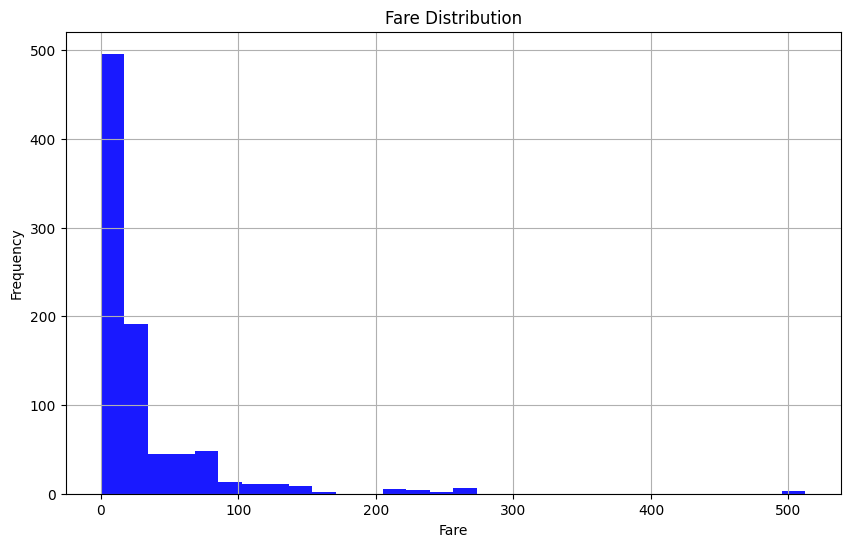

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [3]:
# Name 컬럼 Unique 확인
for name in df.Name:
  if 'Mr' in name:
    pass
  elif 'Miss' in name:
    pass
  elif 'Mrs' in name:
    pass
  else:
    print(name)

# Age 컬럼 null값 끄집어내기
df.Age.unique()
df.Age.isnull().info()
df[df.Age.isnull()].Sex

# 남/여 별 나이 평균
round(df.groupby('Sex').Age.mean().female)
round(df.groupby('Sex').Age.mean().male)

# fare 값의 분포를 확인하고 이에 따라 pclass 컬럼 재정의
import matplotlib.pyplot as plt

df['Fare'].isnull().sum()

# 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(df.Fare, bins=30, color='blue', alpha=0.9)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

df.Fare.describe()

# 0, 5, 10, 15, 20, 30, 50, 75, 100, 200, 600 : 10개 분류

In [50]:
 # # 결측값이 많은 컬럼, 필요없는 컬럼 삭제
df.drop(columns=['PassengerId', 'Pclass', 'Ticket', 'Cabin', 'Name'], inplace=True)
df.head()


,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,1,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,0,male,35.0,0,0,8.0500,S


In [51]:
# Embarked 결측치 처리
df['Embarked'].fillna('S', inplace=True)

# sibsp와 parch 합쳐서 가족 규모 변수 생성
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # 자기 자신 포함
df.drop(columns=['SibSp', 'Parch'], inplace=True)

# Age 결측치 : Sex 별 평균으로 결측치 처리
age_mean_by_sex = round(df.groupby('Sex').Age.transform('mean'))
df['Age'].fillna(age_mean_by_sex, inplace=True)

# Age를 6개 범주로 확대
bins = [0, 5, 12, 18, 35, 60, 100]
labels = [1, 2, 3, 4, 5, 6]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.drop(columns=['Age'], inplace=True)

# Sex 컬럼 정수 변환
df.Sex.replace({'female':1, 'male':0}, inplace=True)

# Embarked를 더미 변수로 변환
df = pd.get_dummies(df, columns=['Embarked'])

# Fare를 10개 범주로 확대
fare_bins = [0, 5, 10, 15, 20, 30, 50, 75, 100, 200, 600]
fare_labels = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)
df.drop(columns=['Fare'], inplace=True)

In [52]:
df.isnull().sum()

Survived      0
Sex           0
FamilySize    0
AgeGroup      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
FareGroup     0
dtype: int64

In [53]:
# 타겟 변수와 피처 변수 설정
X = df.drop('Survived', axis=1)
y = df['Survived']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred)) # 예측 정확도
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))


(712, 7) (179, 7) (712,) (179,)
Accuracy: 0.8044692737430168
